In [2]:
import pandas as pd
import urllib.request
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Retrieve the Excel file from IBGE ftp

In [3]:
excel_2015 = "ftp://ftp.ibge.gov.br/Acesso_a_internet_e_posse_celular/2015/Tabelas_de_Resultados/xlsx/01_Pessoas_de_10_Anos_ou_Mais_de_Idade/02_Equipamento_Utlizado_para_Acessar_a_Internet.xlsx"

# Create DataFrame with the *.xlsx file

In [6]:
df = pd.read_excel(excel_2015, sheet_name='Tab 1.2.1.1 e 1.2.1.2')

In [7]:
df.head()

,"Tabela 1.2.1.1 - Pessoas de 10 anos ou mais de idade que utilizaram a Internet, no período de referência dos últimos três meses, por Grandes Regiões, segundo o equipamento utilizado para acessar a Internet - 2015",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,"Tabela 1.2.1.2 - Distribuição das pessoas de 10 anos ou mais de idade, por Grandes Regiões, segundo o equipamento utilizado para acessar a Internet - 2015",Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Equipamento utilizado para acessar a Internet,Pessoas de 10 anos ou mais de idade que utiliz...,NaN,NaN,NaN,NaN,NaN,Equipamento utilizado para acessar a Internet,Distribuição das pessoas de 10 anos ou mais de...,NaN,NaN,NaN,NaN,NaN
2,NaN,Brasil,Grandes Regiões,NaN,NaN,NaN,NaN,NaN,Brasil,Grandes Regiões,NaN,NaN,NaN,NaN
3,NaN,NaN,Norte,Nordeste,Sudeste,Sul,Centro-Oeste,NaN,NaN,Norte,Nordeste,Sudeste,Sul,Centro-Oeste
4,Total,102083,6715.31,21831.1,49247,15759,8530.74,Total,100,100,100,100,100,100


In [8]:
df = df[df.columns[0:2]]

In [9]:
df.head()

,"Tabela 1.2.1.1 - Pessoas de 10 anos ou mais de idade que utilizaram a Internet, no período de referência dos últimos três meses, por Grandes Regiões, segundo o equipamento utilizado para acessar a Internet - 2015",Unnamed: 1
0,NaN,NaN
1,Equipamento utilizado para acessar a Internet,Pessoas de 10 anos ou mais de idade que utiliz...
2,NaN,Brasil
3,NaN,NaN
4,Total,102083


In [10]:
df.columns = ['Label', 'Total']

In [11]:
df

,Label,Total
0,NaN,NaN
1,Equipamento utilizado para acessar a Internet,Pessoas de 10 anos ou mais de idade que utiliz...
2,NaN,Brasil
3,NaN,NaN
4,Total,102083
5,Microcomputador,NaN
6,Utilizaram,72608
7,Somente microcomputador,11080
8,Não utilizaram,29475.1
9,Telefone móvel celular ou tablet,NaN


### Remove useless rows

In [12]:
df = df.drop(df.index[:5])
df = df.drop(df.index[-1])
df = df.drop(df.index[-1])
df

,Label,Total
5,Microcomputador,NaN
6,Utilizaram,72608
7,Somente microcomputador,11080
8,Não utilizaram,29475.1
9,Telefone móvel celular ou tablet,NaN
10,Utilizaram,90484.9
11,Somente telefone móvel celular ou tablet,28765.1
12,Não utilizaram,11598.2
13,Telefone móvel celular,NaN
14,Utilizaram,89634.4


### Get all gadgets names

In [13]:
gadgets = df[df.isna().Total].Label.iloc[:].values
gadgets

array(['Microcomputador', 'Telefone móvel celular ou tablet',
       'Telefone móvel celular', 'Tablet', 'Televisão',
       'Outro equipamento'], dtype=object)

### Get a List with all 'somente *' values

In [14]:
df = df.dropna()
values_2015 = df[df.Label.str.contains('Somente')].Total.iloc[:].values
values_2015

array([11079.97, 28765.132, 27003.38, 368.096], dtype=object)

# Define a funtion to execute all previous DF steps

In [16]:
def extract_data(excel):
    df = pd.read_excel(excel, sheet_name='Tab 1.2.1.1 e 1.2.1.2')
    
    df = df[df.columns[0:2]]
    df.columns = ['Label', 'Total']
        
    df = df.dropna()
    return df[df.Label.str.contains('Somente')].Total.iloc[:].values
    

In [17]:
excel_2014 = 'ftp://ftp.ibge.gov.br/Acesso_a_internet_e_posse_celular/2014/Tabelas_de_Resultados/xlsx/01_Pessoas_de_10_Anos_ou_Mais_de_Idade/02_Equipamento_Utlizado_para_Acessar_a_Internet.xlsx'
values_2014 = extract_data(excel_2014)

In [18]:
excel_2013 = 'ftp://ftp.ibge.gov.br/Acesso_a_internet_e_posse_celular/2013/tabelas_xls/01pessoas/02equipamentos.xls'
values_2013 = extract_data(excel_2013)

# Build new DataFrame with all years

In [19]:
dic = {
    'Gadget': gadgets[:4],
    '2015': values_2015, 
    '2014': values_2014, 
    '2013': values_2013
}

In [20]:
df_years = pd.DataFrame(dic)
df_years.head()

,2013,2014,2015,Gadget
0,43478.1,23124.2,11080,Microcomputador
1,6896.05,18081.8,28765.1,Telefone móvel celular ou tablet
2,6278.65,16637.8,27003.4,Telefone móvel celular
3,321.288,475.233,368.096,Tablet


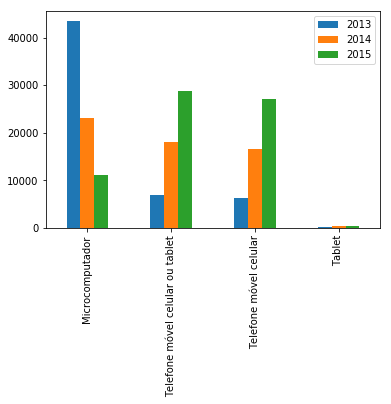

In [21]:
df_years.plot.bar(x=df_years.Gadget.iloc[:].values)